In [1]:
import ehtim as eh

Welcome to eht-imaging! v 1.2.4 



In [2]:
# Load in example image and array
im = eh.image.load_txt('../models/avery_sgra_eofn.txt')
eht = eh.array.load_txt('../arrays/EHT2017.txt')

Loading text image:  ../models/avery_sgra_eofn.txt


In [3]:
# create example observation uvfits file
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 sgrscat=False, ampcal=True, phasecal=False)
obs.save_uvfits('../../example_survey_obs.uvfits')

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 
Building NX table


In [4]:
# create a mock SEFD error budget for this array
sites = list(obs.tkey.keys())
SEFD_errs = {}
for site in sites:
    SEFD_errs[site] = 0.1

print(SEFD_errs)

{'ALMA': 0.1, 'LMT': 0.1, 'PV': 0.1, 'APEX': 0.1, 'SMA': 0.1, 'SMT': 0.1, 'SPT': 0.1, 'JCMT': 0.1}


In [5]:
# create a dict of non-varying imaging parameters, such as filenames
# see a full list of fixed parameters in the docs
params_fixed = eh.survey.create_params_fixed(infile='../../example_survey_obs.uvfits',
                                            outfile_base='example_survey',
                                            outpath='../../example_survey_output/',
                                            nproc=-1, # use all available cores, can be changed
                                            overwrite=True,
                                            niter_static=2,
                                            SEFD_error_budget= SEFD_errs,
                                            ttype='fast')

print(params_fixed)

{'infile': '../../example_survey_obs.uvfits', 'outfile_base': 'example_survey', 'outpath': '../../example_survey_output/', 'ground_truth_img': 'None', 'save_imgsums': False, 'save_uvfits': True, 'save_pdf': False, 'save_stats': True, 'save_caltab': True, 'nproc': -1, 'backend': 'multiprocessing', 'ttype': 'fast', 'overwrite': True, 'selfcal': True, 'gaintol': [0.02, 0.2], 'niter_static': 2, 'blurfrac': 1, 'maxit': 100, 'stop': 0.0001, 'fov': 128, 'npixels': 64, 'reverse_taper_uas': 5, 'uv_zblcut': 100000000.0, 'SEFD_error_budget': {'ALMA': 0.1, 'LMT': 0.1, 'PV': 0.1, 'APEX': 0.1, 'SMA': 0.1, 'SMT': 0.1, 'SPT': 0.1, 'JCMT': 0.1}}


In [6]:
# create a DataFrame of parameters to be surveyed over
psets = eh.survey.create_survey_psets(zbl=[0.6,0.7], sys_noise=[0,0.01], prior_fwhm=[50])
display(psets)

,zbl,sys_noise,avg_time,prior_fwhm,sc_phase,xdw_phase,sc_ap,xdw_ap,amp,cphase,logcamp,simple,l1,tv,tv2,flux,epsilon_tv,i
0,0.6,0.00,scan,50,0,10,0,1,0.2,1,1,1,1,1,1,1,1.000000e-10,0
1,0.6,0.01,scan,50,0,10,0,1,0.2,1,1,1,1,1,1,1,1.000000e-10,1
2,0.7,0.00,scan,50,0,10,0,1,0.2,1,1,1,1,1,1,1,1.000000e-10,2
3,0.7,0.01,scan,50,0,10,0,1,0.2,1,1,1,1,1,1,1,1.000000e-10,3


In [7]:
# to run only a single pset, create an instance of the ParameterSet class and use the function run()
# should take ~1 minute to run
pset = dict(psets.iloc[0])

ps = eh.survey.ParameterSet(pset, params_fixed)
ps.run()

Loading uvfits:  ../../example_survey_obs.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 4.248440 s
J: 97.889630
chi2_amp : 188.42 chi2_cphase : 37.40 chi2_logcamp : 11.76 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 4.167313 s
J: 90.334988
chi2_amp : 211.27 chi2_cphase : 22.08 chi2_logcamp : 14.51 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with fast Fourier Transform...
Producing clean visibilities from image with fast FT . . . 
Not Using Multiprocessing
Scan 106/107 : [-----------------------

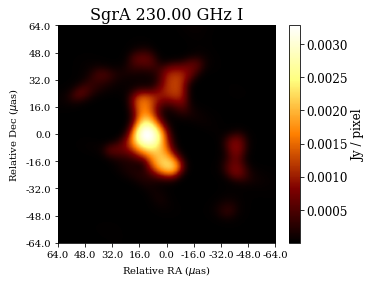

In [8]:
# display output image
# won't necessarily be good as the default selection of hyperparameters is not optimized for anything
ps.im_out.display();

In [9]:
# to run all parameter sets, use the run_survey function
# should take ~1-2 minutes to run
eh.survey.run_survey(psets, params_fixed)

initializing paramsurvey multiprocessing backend
initializing multiprocessing pool with 7 processes
paramsurvey.map start time 20221129-165457
paramsurvey.map pset count 4, pset columns ['zbl', 'sys_noise', 'avg_time', 'prior_fwhm', 'sc_phase', 'xdw_phase', 'sc_ap', 'xdw_ap', 'amp', 'cphase', 'logcamp', 'simple', 'l1', 'tv', 'tv2', 'flux', 'epsilon_tv', 'i']


Welcome to eht-imaging! v 1.2.4 

Loading uvfits:  ../../example_survey_obs.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 4.751679 s
J: 70.631814
chi2_amp : 144.78 chi2_cphase : 23.55 chi2_logcamp : 8.37 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 4.803640 s
J: 59.472611
chi2_amp : 145.98 chi2_cphase : 9.25 chi2_logcamp : 9.47 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with fast Fourier Transform...
Producing clean visibilities from image with fast FT . . . 
Not Using Multiprocessing
Scan 001

Scan 106/107 : [----------------------------- ]99%

counter default_iowait, total 9s, mean 4.57s, counts 2
counter default_iowait, 50%tile: 4.58s
counter default_iowait, 90%tile: 4.61s
counter default_iowait, 95%tile: 4.61s
counter default_iowait, 99%tile: 4.61s
counter default_wallclock, total 160s, mean 79.87s, counts 2
counter default_wallclock, 50%tile: 79.87s
counter default_wallclock, 90%tile: 80.38s
counter default_wallclock, 95%tile: 80.38s
counter default_wallclock, 99%tile: 80.38s
default progress: total: 4, active: 0, finished: 4, failures: 0, exceptions: 0
counter default_iowait, total 18s, mean 4.54s, counts 4
counter default_iowait, 50%tile: 4.58s
counter default_iowait, 90%tile: 4.61s
counter default_iowait, 95%tile: 4.61s
counter default_iowait, 99%tile: 4.61s
counter default_wallclock, total 338s, mean 84.57s, counts 4
counter default_wallclock, 50%tile: 80.38s
counter default_wallclock, 90%tile: 90.11s
counter default_wallclock, 95%tile: 90.11s
counter default_wallclock, 99%tile: 90.11s
/Users/nitikayadlapalli/opt/anac